<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Excercicio-Limpeza-de-dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

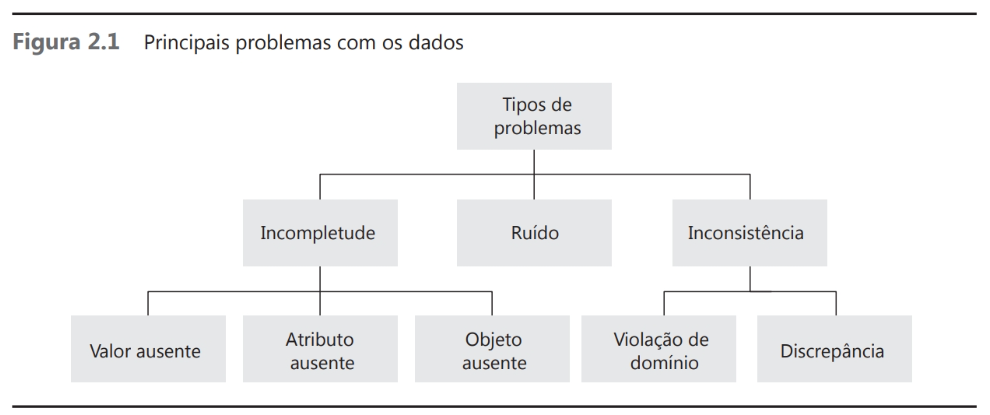

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes. 


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso. 

## Plano de ação

### Dados inconsistesntes

Analisar cada coluna e identificar as inconsistências. Cada dado inconsistente será tratado de forma particular, dependendo da incosistência encontrada. Por exemplo, se uma coluna que possui dados majoritariamente decimais, mas apresenta um dado com valor `"2.5 é isso aí"`, será tratado para remover a frase `"é isso aí"` preservando apenas o valor decimal.
O objetivo dessa abordagem é tentar preservar ao máximo os dados sem ter que usar técnicas de subsittuição.

### Valore ausentes

- Para colunas com valores **majoritariamente decimais** será utilizada a média dos valores da coluna. Essa abordagem faz com que as lacunas sejam preenchidas com valores que seguem a tendencia de preenchimento dos demais valores da mesma coluna.
- Para colunas com valores **majoritariamente inteiros** será utilizada a moda. Essa abordagem visa preservar a tendencia de escolha dos demais valores da coluna.
- Para colunas com valores do **tipo object** que se tratavam de opnião dos particiapantes ou categorias, como `father_profession`, os valores faltantes foram substituídos por `Did not respond`.

### Valores do tipo string

Os valores em string que representam frases ou palavras foram padronizados para conter apenas caracteres ASCII (conversão), letras minúsculas (exceto no início da frase ou após pontuação) e serem separados por `,` ao invés de `/` como ocorreu em muitos casos.



## Solução


### Carga do conjunto de dados `food_coded.csv`

In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


### Métodos auxiliares

In [2]:
def print_column_info(df, collumn_name):
  # Indentificar dados da coluna.
  print(df[collumn_name].value_counts(), '\n')
  # Identificar tipo dos dados.
  print(f'Data Type: {df[collumn_name].dtype}')

def get_missing_values(df, collumn_name):
  # Exibir valores faltantes.
  indices_ausentes = df[df[collumn_name].isna()].index.tolist()
  display(df.loc[indices_ausentes, [collumn_name]])
  return indices_ausentes

def replace_null_values_with_mean(df, collumn_name):
  # Calcular média dos valores de collumn_name.
  media = round(df[collumn_name].mean(), 3)
  print(f'Media {collumn_name}: {media}')
  # Preencher valores.
  return df[collumn_name].fillna(media)

def replace_null_values_with_mode(df, collumn_name):
  # Calcular moda dos valores de collumn_name.
  moda = df[collumn_name].mode()[0]
  print(f'Moda {collumn_name}: {moda}')
  # Preencher valores.
  return df[collumn_name].fillna(moda)

def replace_multiple_values(df, collumn_name, indices, value):
  # Substituir valores.
  df.loc[indices, collumn_name] = value
  return df

def standardize_string_values(df, collumn_name):
  # Troca " /" por ",".
  df[collumn_name] = df[collumn_name].str.replace(' /', ',')
  df[collumn_name] = df[collumn_name].str.replace('/ ', ', ')
  df[collumn_name] = df[collumn_name].str.replace('/', ', ')
  # Lowercase.
  df[collumn_name] = df[collumn_name].str.lower()
  # Capitalize.
  df[collumn_name] = df[collumn_name].str.replace(r'(^|\. |\.|\?|!)([a-z])', lambda x: x.group(0).upper(), regex=True)
  # Padronizar em ASCII.
  df[collumn_name] = df[collumn_name].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
  return df

### Identificar linhas e colunas com dados faltantes

1. Identificar linhas com todos os atributos com valores nulos

In [3]:
display(df[df.isnull().all(axis=1)])

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight


2. Identificar colunas

In [4]:
display(df.columns)

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

3. Identificar colunas com dados faltantes

In [5]:
display(df.columns[df.isna().any()])

Index(['GPA', 'calories_day', 'calories_scone', 'comfort_food',
       'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'cuisine',
       'diet_current', 'drink', 'eating_changes', 'employment', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine', 'fav_food',
       'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
       'life_rewarding', 'marital_status', 'meals_dinner_friend',
       'mother_education', 'mother_profession', 'on_off_campus',
       'persian_food', 'self_perception_weight', 'soup', 'sports',
       'tortilla_calories', 'type_sports', 'weight'],
      dtype='object')


### (Exemplo) Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda). 

In [6]:
display(df.loc[[63],'soup':])
df['soup'] = df['soup'].fillna(df['soup'].mode()[0])
display(df.loc[[63],'soup':])


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180


### Ajuste do atributo `GPA`:

A coluna `GPA` possui dados faltantes e inconsistentes, sendo uma das inconsistências, um célula preenchida com o valor `3.79 bitch`. Essa célula será tratada de forma particular, removendo a substring `bitch`. Por fim, todos os valores serão convertidos para o tipo adequado (numérico) e as lacunas (valores faltantes) serão preenchidas com a média dos valores válidos da coluna.

In [7]:
print_column_info(df, 'GPA')

GPA
3.5           13
3             11
3.7           10
3.2           10
3.3            9
3.4            9
3.9            7
3.6            7
3.8            6
2.8            5
4              4
3.1            3
2.6            2
2.9            2
3.83           2
2.25           1
2.4            1
3.654          1
3.87           1
3.65           1
3.904          1
2.2            1
3.605          1
3.89           1
3.35           1
3.292          1
Personal       1
3.67           1
3.73           1
3.79 bitch     1
2.71           1
3.68           1
3.75           1
3.92           1
Unknown        1
3.77           1
3.63           1
3.882          1
Name: count, dtype: int64 

Data Type: object


In [8]:
# Dados com valores inconsistentes para a coluna.
display(df.loc[[61, 73, 104], 'GPA':])
# Tratar célula da linha 73 da coluna GPA para remover informação adicional desnecessária.
df.loc[73, 'GPA'] = 3.79
# Converter coluna para tipo numérico.
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'GPA')
# Calcular média dos valores não nulos e preencher valores
df['GPA'] = replace_null_values_with_mean(df, 'GPA')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['GPA']])

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3.0,...,2.0,2.0,2,725.0,500,NaN,3,1,1315,118
73,3.79 bitch,2,1,720,4.0,420.0,2,"Chips, ice cream","Boredom, stress",2.0,...,1.0,1.0,2,1165.0,850,baseball,4,1,1315,200
104,Unknown,1,1,720,3.0,420.0,2,"Chips, chocolate, ,mozzarella sticks","Boredom, sadness, anxiety",2.0,...,2.0,2.0,5,940.0,690,None at the moment,5,1,1315,230


,GPA
15,NaN
61,NaN
102,NaN
104,NaN


Media GPA: 3.419


,GPA
15,3.419
61,3.419
102,3.419
104,3.419



### Ajuste do atributo `calories_day`:

A coluna `calories_day` possui dados faltantes que serão preenchidoa com o valor mais escolhido na amostra (moda).

In [9]:
print_column_info(df, 'calories_day')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'calories_day')
# Calcular a moda e preencher valores.
df['calories_day'] = replace_null_values_with_mode(df, 'calories_day')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['calories_day']])

calories_day
3.0    63
4.0    23
2.0    20
Name: count, dtype: int64 

Data Type: float64


,calories_day
0,NaN
8,NaN
15,NaN
39,NaN
47,NaN
48,NaN
53,NaN
59,NaN
65,NaN
71,NaN


Moda calories_day: 3.0


,calories_day
0,3.0
8,3.0
15,3.0
39,3.0
47,3.0
48,3.0
53,3.0
59,3.0
65,3.0
71,3.0


### Ajuste do atributo `calories_scone`:

A coluna `calories_scone` possui um dado faltante (linha 100). Esse valor será preenchido com o valor mais escolhido na coluna (moda).

In [10]:
print_column_info(df, 'calories_scone')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'calories_scone')
# Calcular a moda e preencher valores.
df['calories_scone'] = replace_null_values_with_mode(df, 'calories_scone')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['calories_scone']])

calories_scone
420.0    79
980.0    23
315.0    22
Name: count, dtype: int64 

Data Type: float64


,calories_scone
100,NaN


Moda calories_scone: 420.0


,calories_scone
100,420.0


### Ajuste do atributo `comfort_food_reasons_coded`:

A coluna `comfort_food_reasons_coded` original será excluida pois o data set possui também a coluna `comfort_food_reasons_coded.1` que é igual, mas não possui dados faltantes. Após esse tratamento, a coluna `comfort_food_reasons_coded.1` será renomeada para `comfort_food_reasons_coded`.

In [11]:
# Exibir informações sobre as colunas.
print_column_info(df, 'comfort_food_reasons_coded')
print_column_info(df, 'comfort_food_reasons_coded.1')
# Exibir valores faltantes.
get_missing_values(df, 'comfort_food_reasons_coded')
get_missing_values(df, 'comfort_food_reasons_coded.1')
# Remover coluna comfort_food_reasons_coded.
df = df.drop('comfort_food_reasons_coded', axis=1)
# Renomear coluna comfort_food_reasons_coded.1.
df = df.rename(columns={'comfort_food_reasons_coded.1': 'comfort_food_reasons_coded'})
# Exibir coluna renomeada.
display(df.loc[:, 'comfort_food_reasons_coded':])

comfort_food_reasons_coded
2.0    49
1.0    22
3.0    18
9.0     5
5.0     4
4.0     3
7.0     3
6.0     1
8.0     1
Name: count, dtype: int64 

Data Type: float64
comfort_food_reasons_coded.1
2    53
1    28
3    23
5     7
7     5
9     5
4     3
6     1
Name: count, dtype: int64 

Data Type: int64


,comfort_food_reasons_coded
106,NaN
107,NaN
108,NaN
109,NaN
110,NaN
111,NaN
112,NaN
113,NaN
114,NaN
115,NaN


,comfort_food_reasons_coded.1


,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,NaN,A college student with an imbalanced diet tryi...,2,1.0,Eating Pizza as an excuse when there is nothin...,1,3,4,3.0,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3,NaN,"Rice, oatmeal, and tea",2,1.0,less rice,1,3,3,3.0,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,7,1.0,I try to eat as healthy as possible everyday. ...,1,2.0,I don't eat as much on a daily basis since com...,1,8,5,2.0,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


### Ajuste do atributo `comfort_food`:

A coluna `comfort_food` possui um dado faltante (linhas 74) e um valor `"none"` (linha 0). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [12]:
# Exibir informações sobre as colunas.
print_column_info(df, 'comfort_food')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'comfort_food')
# Exibir valor 'none' na coluna comfort_food.
display(df[df['comfort_food'] == 'none'])
# Preencher valores faltantes.
df = replace_multiple_values(df, 'comfort_food', [0, 74], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'comfort_food')
# Exibir linhas alteradas.
display(df.loc[[0, 74], ['comfort_food']])
# Exibir informações sobre as colunas.
print_column_info(df, 'comfort_food')

comfort_food
none                                       1
chocolate, chips, ice cream                1
frozen yogurt, pizza, fast food            1
Pizza, Mac and cheese, ice cream           1
Ice cream, chocolate, chips                1
                                          ..
wine. mac and cheese, pizza, ice cream     1
Pizza / Wings / Cheesecake                 1
rice, potato, seaweed soup                 1
Mac n Cheese, Lasagna, Pizza               1
Chocolates, pizza, and Ritz.               1
Name: count, Length: 124, dtype: int64 

Data Type: object


,comfort_food
74,NaN


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,2.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


,comfort_food
0,Did not respond
74,Did not respond


comfort_food
Did not respond                            2
Chocolate, chips, ice cream                1
Frozen yogurt, pizza, fast food            1
Pizza, mac and cheese, ice cream           1
Ice cream, chocolate, chips                1
                                          ..
Wine. Mac and cheese, pizza, ice cream     1
Pizza, wings, cheesecake                   1
Rice, potato, seaweed soup                 1
Mac n cheese, lasagna, pizza               1
Chocolates, pizza, and ritz.               1
Name: count, Length: 124, dtype: int64 

Data Type: object


### Ajuste do atributo `comfort_food_reasons`:

A coluna `comfort_food_reasons` possui dois dados faltantes (linhas 74 e 88). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [13]:
# Exibir informações sobre as colunas.
print_column_info(df, 'comfort_food_reasons')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'comfort_food_reasons')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'comfort_food_reasons', [74, 88], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'comfort_food_reasons')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['comfort_food_reasons']])
# Exibir informações sobre as colunas.
print_column_info(df, 'comfort_food_reasons')

comfort_food_reasons
boredom                                          7
Boredom                                          3
Boredom                                          3
sadness                                          3
Stress and boredom                               2
                                                ..
Happiness, boredom, social event                 1
boredom and sadness                              1
Loneliness / Homesick / Sadness                  1
happiness, they are some of my favorite foods    1
hormones, Premenstrual syndrome.                 1
Name: count, Length: 106, dtype: int64 

Data Type: object


,comfort_food_reasons
74,NaN
88,NaN


,comfort_food_reasons
74,Did not respond
88,Did not respond


comfort_food_reasons
Boredom                                          10
Boredom, sadness                                  4
Boredom                                           3
Stress, boredom                                   3
Sadness                                           3
                                                 ..
Happiness, boredom, social event                  1
Boredom and sadness                               1
Loneliness, homesick, sadness                     1
Happiness, they are some of my favorite foods     1
Hormones, premenstrual syndrome.                  1
Name: count, Length: 102, dtype: int64 

Data Type: object


### Ajuste do atributo `cook`:

A coluna `cook` possui três dados faltantes (linhas 82, 88 e 124). Esses valore serão preenchido com o valor que mais se aprece na coluna (moda).

In [14]:
print_column_info(df, 'cook')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'cook')
# Calcular a moda e preencher valores.
df['cook'] = replace_null_values_with_mode(df, 'cook')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['cook']])

cook
3.0    49
2.0    34
4.0    18
1.0    13
5.0     8
Name: count, dtype: int64 

Data Type: float64


,cook
82,NaN
88,NaN
124,NaN


Moda cook: 3.0


,cook
82,3.0
88,3.0
124,3.0


### Ajuste do atributo `cuisine`:

A coluna `cuisine` possui 17 dados faltantes. Esses valore serão preenchido com o valor mais que aparece na coluna (moda).

In [15]:
print_column_info(df, 'cuisine')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'cuisine')
# Calcular a moda e preencher valores.
df['cuisine'] = replace_null_values_with_mode(df, 'cuisine')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['cuisine']])

cuisine
1.0    86
2.0    13
3.0     3
4.0     3
6.0     2
5.0     1
Name: count, dtype: int64 

Data Type: float64


,cuisine
0,NaN
5,NaN
16,NaN
29,NaN
32,NaN
36,NaN
55,NaN
61,NaN
69,NaN
89,NaN


Moda cuisine: 1.0


,cuisine
0,1.0
5,1.0
16,1.0
29,1.0
32,1.0
36,1.0
55,1.0
61,1.0
69,1.0
89,1.0


### Ajuste do atributo `diet_current`:

A coluna `diet_current` possui dois dados faltantes (linhas 74 e 88). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [16]:
# Exibir informações sobre as colunas.
print_column_info(df, 'diet_current')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'diet_current')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'diet_current', [74], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'diet_current')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['diet_current']])
# Exibir informações sobre as colunas.
print_column_info(df, 'diet_current')

diet_current
eat good and exercise                                                                                                                                                        1
I eat about three times a day with some snacks. I try to eat healthy but it doesn't always work out that- sometimes eat fast food and mainly eat at Laker/ Egan              1
toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner                                                           1
College diet, cheap and easy foods most nights. Weekends traditionally, cook better homemade meals                                                                           1
I try to eat healthy but often struggle because of living on campus. I still try to keep the choices I do make balanced with fruits and vegetables and limit the sweats.     1
                                                                                                                

,diet_current
74,NaN


,diet_current
74,Did not respond


diet_current
Eat good and exercise                                                                                                                                                        1
I eat about three times a day with some snacks. I try to eat healthy but it doesn't always work out that- sometimes eat fast food and mainly eat at laker, egan              1
Toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner                                                           1
College diet, cheap and easy foods most nights. Weekends traditionally, cook better homemade meals                                                                           1
I try to eat healthy but often struggle because of living on campus. I still try to keep the choices i do make balanced with fruits and vegetables and limit the sweats.     1
                                                                                                                

### Ajuste do atributo `drink`:

A coluna `drink` possui dois dados faltantes. Esses valore serão preenchido com o valor que mais aparece na coluna (moda).

In [17]:
print_column_info(df, 'drink')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'drink')
# Calcular a moda e preencher valores.
df['drink'] = replace_null_values_with_mode(df, 'drink')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['drink']])

drink
2.0    69
1.0    54
Name: count, dtype: int64 

Data Type: float64


,drink
21,NaN
63,NaN


Moda drink: 2.0


,drink
21,2.0
63,2.0


### Ajuste do atributo `eating_changes`:

A coluna `eating_changes` possui dados faltantes (linhas 53, 63 e 74) e valores `"none"`. Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [18]:
# Exibir informações sobre as colunas.
print_column_info(df, 'eating_changes')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'eating_changes')
# Exibir valor 'none' na coluna eating_changes.
display(df[df['eating_changes'] == 'none'])
# Preencher valores faltantes.
df = replace_multiple_values(df, 'eating_changes', [15, 31, 53, 63, 74], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'eating_changes')
# Exibir linhas alteradas.
display(df.loc[[15, 31, 53, 63, 74], ['eating_changes']])
# Exibir informações sobre as colunas.
print_column_info(df, 'eating_changes')

eating_changes
none                                                                                                                                                    2
I eat out more than usual.                                                                                                                              1
sometimes choosing to eat fast food instead of cooking simply for convenience                                                                           1
Accepting cheap and premade/store bought foods                                                                                                          1
I have eaten generally the same foods but I do find myself eating the same food frequently due to what I have found I like from egan and the laker.     1
                                                                                                                                                       ..
I have noticed there is less time for a prepared meal, so qui

,eating_changes
53,NaN
63,NaN
74,NaN


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,3.419,2,2,430,3.0,980.0,2,"Cookies, donuts, candy bars",Boredom,4.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180
31,4.000,2,1,610,3.0,420.0,2,"Chips and dip, pepsi,","Stres, boredom, and nighttime",2.0,...,2.0,2.0,4,940.0,690,none organized,5,1,1315,205


,eating_changes
15,Did not respond
31,Did not respond
53,Did not respond
63,Did not respond
74,Did not respond


eating_changes
Did not respond                                                                                                                                         5
I eat out more than usual.                                                                                                                              1
Sometimes choosing to eat fast food instead of cooking simply for convenience                                                                           1
Accepting cheap and premade, store bought foods                                                                                                         1
I have eaten generally the same foods but i do find myself eating the same food frequently due to what i have found i like from egan and the laker.     1
                                                                                                                                                       ..
I have noticed there is less time for a prepared meal, so qui

### Ajuste do atributo `employment`:

A coluna `employment` possui oito dados faltantes. Esses valore serão preenchido com o valor que mais aparece na coluna (moda).

In [19]:
print_column_info(df, 'employment')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'employment')
# Calcular a moda e preencher valores.
df['employment'] = replace_null_values_with_mode(df, 'employment')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['employment']])

employment
2.0    60
3.0    54
1.0     2
Name: count, dtype: int64 

Data Type: float64


,employment
43,NaN
47,NaN
49,NaN
52,NaN
53,NaN
83,NaN
94,NaN
105,NaN
106,NaN


Moda employment: 2.0


,employment
43,2.0
47,2.0
49,2.0
52,2.0
53,2.0
83,2.0
94,2.0
105,2.0
106,2.0


### Ajuste do atributo `exercise`:

A coluna `exercise` possui dados faltantes. Esses valore serão preenchido com o valor mais aparece na coluna (moda).

In [20]:
print_column_info(df, 'exercise')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'exercise')
# Calcular a moda e preencher valores.
df['exercise'] = replace_null_values_with_mode(df, 'exercise')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['exercise']])

exercise
1.0    57
2.0    44
3.0    11
Name: count, dtype: int64 

Data Type: float64


,exercise
8,NaN
24,NaN
32,NaN
42,NaN
43,NaN
45,NaN
53,NaN
59,NaN
66,NaN
83,NaN


Moda exercise: 1.0


,exercise
8,1.0
24,1.0
32,1.0
42,1.0
43,1.0
45,1.0
53,1.0
59,1.0
66,1.0
83,1.0


### Ajuste do atributo `father_education`:

A co umluna `father_education` possui um valor faltante. Esse valor será preenchido com o valor aparece na coluna (moda).

In [21]:
print_column_info(df, 'father_education')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'father_education')
# Calcular a moda e preencher valores.
df['father_education'] = replace_null_values_with_mode(df, 'father_education')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['father_education']])

father_education
4.0    46
2.0    34
5.0    28
3.0    12
1.0     4
Name: count, dtype: int64 

Data Type: float64


,father_education
72,NaN


Moda father_education: 4.0


,father_education
72,4.0


### Ajuste do atributo `father_profession`:

A coluna `father_profession` possui dados faltantes (linhas 30, 97 e 111). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [22]:
# Exibir informações sobre as colunas.
print_column_info(df, 'father_profession')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'father_profession')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'father_profession', [30, 97, 111], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'father_profession')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['father_profession']])
# Exibir informações sobre as colunas.
print_column_info(df, 'father_profession')

father_profession
business owner                  2
IT                              2
Construction                    2
Dentist                         2
Lawyer                          2
                               ..
Accountant                      1
Doctor                          1
CEO of company                  1
Store manager at Giant Eagle    1
Journalist                      1
Name: count, Length: 114, dtype: int64 

Data Type: object


,father_profession
30,NaN
97,NaN
111,NaN


,father_profession
30,Did not respond
97,Did not respond
111,Did not respond


father_profession
Business owner                  4
Did not respond                 3
Mechanic                        2
Dentist                         2
Construction                    2
                               ..
United nations                  1
Doctor                          1
Ceo of company                  1
Store manager at giant eagle    1
Journalist                      1
Name: count, Length: 110, dtype: int64 

Data Type: object


### Ajuste do atributo `fav_cuisine`:

A coluna `fav_cuisine` possui dados faltantes (linhas 74 e 111). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [23]:
# Exibir informações sobre as colunas.
print_column_info(df, 'fav_cuisine')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'fav_cuisine')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'fav_cuisine', [74, 111], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'fav_cuisine')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['fav_cuisine']])
# Exibir informações sobre as colunas.
print_column_info(df, 'fav_cuisine')

fav_cuisine
Italian                                     22
Italian                                     19
italian                                      6
Mexican                                      5
Mexican                                      4
Chinese                                      3
American                                     3
American                                     3
Asian                                        2
Chinese                                      2
Thai                                         2
italian                                      2
Indian                                       2
Korean                                       2
italian food                                 1
Anything american style.                     1
African                                      1
Orange chicken and chow mani noodles         1
Seafood                                      1
Chicken                                      1
American or Italian                          1
d

,fav_cuisine
74,NaN
111,NaN


,fav_cuisine
74,Did not respond
111,Did not respond


fav_cuisine
Italian                                     28
Italian                                     21
Mexican                                      5
Mexican                                      5
American                                     4
Chinese                                      3
American                                     3
Chinese                                      3
Asian                                        2
Did not respond                              2
Thai                                         2
Indian                                       2
Korean                                       2
Seafood                                      1
African                                      1
Turkish                                      1
American or italian                          1
Chicken                                      1
Italian food                                 1
Don't have one                               1
Arabic cuisine                               1
A

### Ajuste do atributo `fav_food`:

A coluna `fav_food` possui dois dados faltantes. Esses valores serão preenchido com o valor mais escolhido na amostra (moda).

In [24]:
print_column_info(df, 'fav_food')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'fav_food')
# Calcular a moda e preencher valores.
df['fav_food'] = replace_null_values_with_mode(df, 'fav_food')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['fav_food']])

fav_food
1.0    73
3.0    38
2.0    12
Name: count, dtype: int64 

Data Type: float64


,fav_food
32,NaN
98,NaN


Moda fav_food: 1.0


,fav_food
32,1.0
98,1.0


### Ajuste do atributo `food_childhood`:

A coluna `food_childhood` possui dado faltante na linha 74. Esse valor foi substituído pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [25]:
# Exibir informações sobre as colunas.
print_column_info(df, 'food_childhood')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'food_childhood')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'food_childhood', indices_ausentes, 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'food_childhood')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['food_childhood']])
# Exibir informações sobre as colunas.
print_column_info(df, 'food_childhood')

food_childhood
Pizza                                        5
Chicken                                      2
pizza                                        2
Steak                                        2
Spaghetti                                    2
                                            ..
Stromboli Mac and Cheese and Pizza           1
Isombe , Plantains and Ugali                 1
Rice and potato                              1
pizza and spaghetti                          1
rice, beans, and chicken / pizza/ tenders    1
Name: count, Length: 114, dtype: int64 

Data Type: object


,food_childhood
74,NaN


,food_childhood
74,Did not respond


food_childhood
Pizza                                       7
Pasta                                       3
Mac and cheese                              3
Spaghetti                                   2
Steak                                       2
                                           ..
Stromboli mac and cheese and pizza          1
Isombe , plantains and ugali                1
Rice and potato                             1
Pizza and spaghetti                         1
Rice, beans, and chicken, pizza, tenders    1
Name: count, Length: 112, dtype: int64 

Data Type: object


### Ajuste do atributo `healthy_meal`:

A coluna `healthy_meal` possui dado faltante na linha 74. Esse valor foi substituído pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [26]:
# Exibir informações sobre as colunas.
print_column_info(df, 'healthy_meal')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'healthy_meal')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'healthy_meal', indices_ausentes, 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'healthy_meal')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['healthy_meal']])
# Exibir informações sobre as colunas.
print_column_info(df, 'healthy_meal')

healthy_meal
looks not oily                                                                                                                                            1
Grains, Veggies, (more of grains and veggies), small protein and fruit with dairy                                                                         1
usually includes natural ingredients; nonprocessed food                                                                                                   1
Fresh fruits& vegetables, organic meats                                                                                                                   1
A lean protein such as grilled chicken, green vegetables and  brown rice or other whole grain                                                             1
                                                                                                                                                         ..
mainly protein and vegetables with a complex carb  

,healthy_meal
74,NaN


,healthy_meal
74,Did not respond


healthy_meal
Looks not oily                                                                                                                                            1
Grains, veggies, (more of grains and veggies), small protein and fruit with dairy                                                                         1
Usually includes natural ingredients; nonprocessed food                                                                                                   1
Fresh fruits& vegetables, organic meats                                                                                                                   1
A lean protein such as grilled chicken, green vegetables and  brown rice or other whole grain                                                             1
                                                                                                                                                         ..
Mainly protein and vegetables with a complex carb  

### Ajuste do atributo `ideal_diet`:

A coluna `ideal_diet` possui dado faltante na linha 74. Esse valor foi substituído pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [27]:
# Exibir informações sobre as colunas.
print_column_info(df, 'ideal_diet')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'ideal_diet')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'ideal_diet', indices_ausentes, 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'ideal_diet')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['ideal_diet']])
# Exibir informações sobre as colunas.
print_column_info(df, 'ideal_diet')

ideal_diet
being healthy                                                                                                                                                         1
Try to eat 5-6 small meals a day. While trying to properly distribute carbs, protein, fruits, veggies, and dairy.                                                     1
i would say my ideal diet is my current diet                                                                                                                          1
Healthy, fresh veggies/fruits & organic foods                                                                                                                         1
Ideally I would like to be able to eat healthier foods in order to loose weight.                                                                                      1
                                                                                                                                                     

,ideal_diet
74,NaN


,ideal_diet
74,Did not respond


ideal_diet
Being healthy                                                                                                                                                         1
Try to eat 5-6 small meals a day. While trying to properly distribute carbs, protein, fruits, veggies, and dairy.                                                     1
I would say my ideal diet is my current diet                                                                                                                          1
Healthy, fresh veggies, fruits & organic foods                                                                                                                        1
Ideally i would like to be able to eat healthier foods in order to loose weight.                                                                                      1
                                                                                                                                                     

### Ajuste do atributo `income`:

A coluna `income` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [28]:
print_column_info(df, 'income')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'income')
# Calcular a moda e preencher valores.
df['income'] = replace_null_values_with_mode(df, 'income')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['income']])

income
6.0    41
5.0    33
4.0    20
3.0    17
2.0     7
1.0     6
Name: count, dtype: int64 

Data Type: float64


,income
102,NaN


Moda income: 6.0


,income
102,6.0


### Ajuste do atributo `life_rewarding`:

A coluna `life_rewarding` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [29]:
print_column_info(df, 'life_rewarding')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'life_rewarding')
# Calcular a moda e preencher valores.
df['life_rewarding'] = replace_null_values_with_mode(df, 'life_rewarding')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['life_rewarding']])

life_rewarding
1.0     23
8.0     18
3.0     15
7.0     14
2.0     13
9.0     11
5.0     10
10.0    10
4.0      6
6.0      4
Name: count, dtype: int64 

Data Type: float64


,life_rewarding
15,NaN


Moda life_rewarding: 1.0


,life_rewarding
15,1.0


### Ajuste do atributo `marital_status`:

A coluna `marital_status` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [30]:
print_column_info(df, 'marital_status')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'marital_status')
# Calcular a moda e preencher valores.
df['marital_status'] = replace_null_values_with_mode(df, 'marital_status')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['marital_status']])

marital_status
1.0    64
2.0    59
4.0     1
Name: count, dtype: int64 

Data Type: float64


,marital_status
83,NaN


Moda marital_status: 1.0


,marital_status
83,1.0


### Ajuste do atributo `meals_dinner_friend`:

A coluna `meals_dinner_friend` possui dados faltantes (linhas 101, 102 e 111). Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [31]:
# Exibir informações sobre as colunas.
print_column_info(df, 'meals_dinner_friend')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'meals_dinner_friend')
# Preencher valores faltantes.
df = replace_multiple_values(df, 'meals_dinner_friend', indices_ausentes, 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'meals_dinner_friend')
# Exibir linhas anteriormente faltantes.
display(df.loc[indices_ausentes, ['meals_dinner_friend']])
# Exibir informações sobre as colunas.
print_column_info(df, 'meals_dinner_friend')

meals_dinner_friend
Chicken, Steak, Pasta                                                2
Pasta, steak, chicken                                                1
chicken and rice with veggies, pasta, some kind of healthy recipe    1
Grilled chicken \rStuffed Shells\rHomemade Chili                     1
Chicken Parmesan, Pulled Pork, Spaghetti and meatballs               1
                                                                    ..
pasta, fish, steak                                                   1
Fried Rice \rBaked potatoes \rCurry Chicken                          1
meat, rice, kimchi                                                   1
Pizza, Spaghetti, Baked Ziti                                         1
Vegetables, Meat, and rice.                                          1
Name: count, Length: 121, dtype: int64 

Data Type: object


,meals_dinner_friend
101,NaN
102,NaN
111,NaN


,meals_dinner_friend
101,Did not respond
102,Did not respond
111,Did not respond


meals_dinner_friend
Pasta, fish, steak                                                   3
Did not respond                                                      3
Chicken, steak, pasta                                                2
Chicken and rice with veggies, pasta, some kind of healthy recipe    1
Chicken parmesan, pulled pork, spaghetti and meatballs               1
                                                                    ..
Chicken, rice, vegetables                                            1
Fried rice \rbaked potatoes \rcurry chicken                          1
Meat, rice, kimchi                                                   1
Pizza, spaghetti, baked ziti                                         1
Vegetables, meat, and rice.                                          1
Name: count, Length: 120, dtype: int64 

Data Type: object


### Ajuste do atributo `mother_education`:

A coluna `mother_education` possui três dados faltantes. Esse valores serão preenchido com o valor mais escolhido na amostra (moda).

In [32]:
print_column_info(df, 'mother_education')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'mother_education')
# Calcular a moda e preencher valores.
df['mother_education'] = replace_null_values_with_mode(df, 'mother_education')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['mother_education']])

mother_education
4.0    46
2.0    30
5.0    23
3.0    18
1.0     5
Name: count, dtype: int64 

Data Type: float64


,mother_education
33,NaN
65,NaN
88,NaN


Moda mother_education: 4.0


,mother_education
33,4.0
65,4.0
88,4.0


### Ajuste do atributo `mother_profession`:

A coluna `mother_profession` possui dados faltantes (linhas 74 e 111) e o valor `"none"` na linha 79. Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [33]:
# Exibir informações sobre as colunas.
print_column_info(df, 'mother_profession')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'mother_profession')
display(df[df['mother_profession'] == 'none'])
# Preencher valores faltantes.
df = replace_multiple_values(df, 'mother_profession', [74, 79, 111], 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'mother_profession')
# Exibir linhas alteradas.
display(df.loc[[74, 79, 111], ['mother_profession']])
# Exibir informações sobre as colunas.
print_column_info(df, 'mother_profession')

mother_profession
Secretary                                    3
Teacher                                      3
unemployed                                   2
Banker                                       2
teacher                                      2
                                            ..
Radiological Technician                      1
Public Health Advisor                        1
Real Estate manageer                         1
Receptionist for a medical supply company    1
House-wife                                   1
Name: count, Length: 112, dtype: int64 

Data Type: object


,mother_profession
74,NaN
111,NaN


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
79,3.9,2,1,720,3.0,420.0,2,Chips sweets popcorn,Boredom,5.0,...,1.0,1.0,5,1165.0,850,"Rowing, Running, and Cycling",4,2,1315,145


,mother_profession
74,Did not respond
79,Did not respond
111,Did not respond


mother_profession
Teacher                                      5
Unemployed                                   3
Secretary                                    3
Nurse                                        3
Did not respond                              3
                                            ..
Radiological technician                      1
Public health advisor                        1
Real estate manageer                         1
Receptionist for a medical supply company    1
House-wife                                   1
Name: count, Length: 108, dtype: int64 

Data Type: object


### Ajuste do atributo `on_off_campus`:

A coluna `on_off_campus` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [34]:
print_column_info(df, 'on_off_campus')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'on_off_campus')
# Calcular a moda e preencher valores.
df['on_off_campus'] = replace_null_values_with_mode(df, 'on_off_campus')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['on_off_campus']])

on_off_campus
1.0    97
2.0    16
3.0     9
4.0     2
Name: count, dtype: int64 

Data Type: float64


,on_off_campus
43,NaN


Moda on_off_campus: 1.0


,on_off_campus
43,1.0


### Ajuste do atributo `persian_food`:

A coluna `persian_food` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [35]:
print_column_info(df, 'persian_food')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'persian_food')
# Calcular a moda e preencher valores.
df['persian_food'] = replace_null_values_with_mode(df, 'persian_food')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['persian_food']])

persian_food
1.0    30
3.0    29
2.0    26
5.0    23
4.0    16
Name: count, dtype: int64 

Data Type: float64


,persian_food
49,NaN


Moda persian_food: 1.0


,persian_food
49,1.0


### Ajuste do atributo `self_perception_weight`:

A coluna `self_perception_weight` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [36]:
print_column_info(df, 'self_perception_weight')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'self_perception_weight')
# Calcular a moda e preencher valores.
df['self_perception_weight'] = replace_null_values_with_mode(df, 'self_perception_weight')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['self_perception_weight']])

self_perception_weight
3.0    45
4.0    31
2.0    31
5.0     6
1.0     6
6.0     5
Name: count, dtype: int64 

Data Type: float64


,self_perception_weight
43,NaN


Moda self_perception_weight: 3.0


,self_perception_weight
43,3.0


### Ajuste do atributo `sports`:

A coluna `sports` possui dois dados faltantes. Esses valores serão preenchidos com o valor mais escolhido na amostra (moda).

In [37]:
print_column_info(df, 'sports')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'sports')
# Calcular a moda e preencher valores.
df['sports'] = replace_null_values_with_mode(df, 'sports')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['sports']])

sports
1.0    75
2.0    48
Name: count, dtype: int64 

Data Type: float64


,sports
19,NaN
121,NaN


Moda sports: 1.0


,sports
19,1.0
121,1.0


### Ajuste do atributo `tortilla_calories`:

A coluna `tortilla_calories` possui um dado faltante. Esse valor será preenchido com o valor mais escolhido na amostra (moda).

In [38]:
print_column_info(df, 'tortilla_calories')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'tortilla_calories')
# Calcular a moda e preencher valores.
df['tortilla_calories'] = replace_null_values_with_mode(df, 'tortilla_calories')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['tortilla_calories']])

tortilla_calories
1165.0    46
940.0     43
725.0     22
580.0     13
Name: count, dtype: int64 

Data Type: float64


,tortilla_calories
100,NaN


Moda tortilla_calories: 1165.0


,tortilla_calories
100,1165.0


### Ajuste do atributo `type_sports`:

A coluna `type_sports` possui inúmeros dados faltantes e com valor `"none"`. Esses valores foram substituídos pela string `Did not respond`, uma vez que se tratava de uma opnião do participante da pesquisa. Além disso, separações que envolviam o uso de `/` foram substituídos por `,` e as strings foram padronizadas para ASCII com letras minúsculas (com exceção para letras após pontuação).

In [39]:
# Exibir informações sobre as colunas.
print_column_info(df, 'type_sports')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'type_sports')
display(df[df['type_sports'] == 'none'])
# Preencher valores faltantes.
indices_ausentes_e_inconsistentes = indices_ausentes + [2, 7, 8, 24, 45, 49, 116, 122]
df = replace_multiple_values(df, 'type_sports', indices_ausentes_e_inconsistentes, 'Did not respond')
# Padronizar valores do tipo string.
df = standardize_string_values(df, 'type_sports')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes_e_inconsistentes, ['type_sports']])
# Exibir informações sobre as colunas.
print_column_info(df, 'type_sports')

type_sports
none                        8
Hockey                      7
Soccer                      4
softball                    4
soccer                      3
                           ..
I used to play softball     1
 None                       1
Tennis, Basketball          1
No, I don't play sport.     1
basketball                  1
Name: count, Length: 66, dtype: int64 

Data Type: object


,type_sports
3,NaN
16,NaN
28,NaN
29,NaN
33,NaN
41,NaN
42,NaN
50,NaN
53,NaN
61,NaN


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
2,3.300,1,1,720,4.0,420.0,2,"Frozen yogurt, pizza, fast food","Stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
7,3.300,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,3.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.300,1,1,430,3.0,420.0,1,"Donuts, ice cream, chips",Boredom,3.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
24,3.900,1,1,720,2.0,420.0,2,"Soup, pasta, brownies, cake","A long day, not feeling well, winter",1.0,...,2.0,2.0,4,940.0,500,none,4,2,1315,105
45,3.605,1,1,610,3.0,315.0,2,"Mac and cheese, fried chicken, cornbread","Hunger, boredom",3.0,...,1.0,2.0,5,940.0,500,none,5,2,900,113
49,3.830,2,1,430,3.0,315.0,2,"Fried chicken. Mashed potatoes, mac and cheese",They taste better than other food. They are a ...,3.0,...,2.0,2.0,4,1165.0,690,none,3,2,900,150
116,3.400,1,1,610,3.0,420.0,2,"Ice cream, chocolate, pizza, cucumber","Loneliness, homework, boredom",3.0,...,1.0,2.0,5,725.0,345,none,5,1,1315,170
122,3.882,1,1,720,3.0,420.0,1,"Rice, potato, seaweed soup",Sadness,3.0,...,1.0,2.0,5,580.0,690,none,4,2,1315,120


,type_sports
3,Did not respond
16,Did not respond
28,Did not respond
29,Did not respond
33,Did not respond
41,Did not respond
42,Did not respond
50,Did not respond
53,Did not respond
61,Did not respond


type_sports
Did not respond                                                34
Hockey                                                          9
Softball                                                        7
Soccer                                                          7
Volleyball                                                      4
Ice hockey                                                      3
Basketball                                                      3
Wrestling                                                       3
Tennis                                                          2
Field hockey                                                    2
Lacrosse                                                        2
Lacrosse                                                        2
Intramural volleyball                                           1
Running                                                         1
Soccer and basketball                                           

### Ajuste do atributo `weight`:

A coluna `weight` possui dados inconsistentes e faltantes. O valor dessa coluna na linha `2` foi tratado de forma individual (recebendo o valor 240), enquanto os demais valores inconsistentes foram tratados como faltantes. Por fim, todos os valores faltantes receberam o valor que mais esteve presente na amostra (moda).

In [40]:
print_column_info(df, 'weight')
# Dados com valores inconsistentes para a coluna.
display(df.loc[[2, 3, 74], 'weight':])
# Ajustando valores inconsistentes.
df.loc[2, 'weight'] = 240
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
# Exibir valores faltantes.
indices_ausentes = get_missing_values(df, 'weight')
# Calcular a moda e preencher valores.
df['weight'] = replace_null_values_with_mode(df, 'weight')
# Exibir linhas alteradas.
display(df.loc[indices_ausentes, ['weight']])

weight
135                         8
140                         8
170                         7
150                         7
185                         6
180                         6
155                         6
175                         6
125                         5
190                         5
165                         5
200                         4
130                         4
145                         4
120                         3
160                         3
128                         2
113                         2
167                         2
210                         2
129                         2
Not sure, 240               1
137                         1
123                         1
116                         1
110                         1
264                         1
I'm not answering this.     1
187                         1
195                         1
105                         1
168                         1
100                         1
205

,weight
2,I'm not answering this.
3,"Not sure, 240"
74,NaN


,weight
3,NaN
32,NaN
67,NaN
74,NaN


Moda weight: 135.0


,weight
3,135.0
32,135.0
67,135.0
74,135.0


### Verificando colunas com dados faltantes novamente

In [41]:
display(df.columns[df.isna().any()])

Index([], dtype='object')